In [4]:
import numpy as np 
import matplotlib.pyplot as plt
!pip install plotly-express
import plotly_express as px
import scipy.stats as sts
import requests
import pandas as pd
import time
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## 1. Матрица Вандермонда (10 баллов)



Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [5]:
  def vander_matrix(x: np.array) -> np.array:
    x = x.reshape((x.shape[0], 1))
    y = np.arange(x.shape[0])
    z = np.hstack(([x]**y))
    return z
  x = np.array(list(map(int, input().split(' '))))
  print(vander_matrix(x)) 

1 2 3 4
[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [0]:
def individual_champ(n: int):
  total_dist = {'winnie' : np.zeros(10**4), 'rabbit' : np.zeros(10**4), 'piglet' : np.zeros(10**4), 'eeyore' : np.zeros(10**4)}
  
  winnie = np.random.exponential(1.0, size=(10**4, 1, n))
  piglet = np.random.normal(1, 1, size=(10**4, 1, n))
  rabbit = np.random.poisson(1, size=(10**4, 1, n))
  eeyore = 2 * np.random.binomial(1, 0.5, size=(10**4, 1, n))

  total_dist['winnie'] = np.sum(winnie, axis=2).flatten()
  total_dist['piglet'] = np.sum(piglet, axis=2).flatten()
  total_dist['rabbit'] = np.sum(rabbit, axis=2).flatten()
  total_dist['eeyore'] = np.sum(eeyore, axis=2).flatten()

  distances = np.hstack((total_dist['winnie'].reshape(10**4, -1), total_dist['piglet'].reshape(10**4, -1), total_dist['rabbit'].reshape(10**4, -1), total_dist['eeyore'].reshape(10**4, -1)))
  win_in_each = np.argmax(distances, axis=1)
  number_of_wins = {'winnie' : np.count_nonzero(win_in_each == 0), 'piglet' : np.count_nonzero(win_in_each==1), 'rabbit' : np.count_nonzero(win_in_each==2), 'eeyore' : np.count_nonzero(win_in_each==3)}
  return number_of_wins

In [0]:
print('Введите длительность забегов в часах:')
n = int(input())
number_of_wins = individual_champ(n)
print('number of wins')
print('winnie:', number_of_wins['winnie'], '\npiglet:', number_of_wins['piglet'], '\nrabbit:', number_of_wins['rabbit'], '\neeyore:', number_of_wins['eeyore'])

Введите длительность забегов в часах:
4
number of wins
winnie: 2380 
piglet: 2595 
rabbit: 2598 
eeyore: 2427


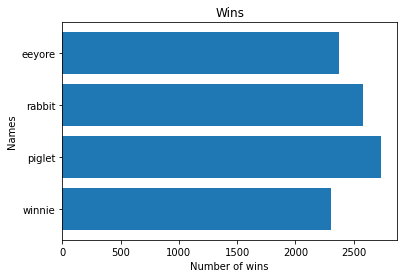

In [0]:
fig, ax = plt.subplots()

names = list(number_of_wins.keys())
wins_number = list(number_of_wins.values())
ax.barh(names, wins_number)


plt.ylabel('Names')
plt.xlabel('Number of wins')
plt.title('Wins')


plt.show()

Количество побед между персонажами практически равное.


In [0]:
#Задание 2
def team_champ(n: int):
  winnie_piglet = np.random.exponential(1.0, size=(10**4, 1, n)) + np.random.normal(1, 1, size=(10**4, 1, n))
  rabbit_eeyore = np.random.poisson(1, size=(10**4, 1, n)) + 2 * np.random.binomial(1, 0.5, size=(10**4, 1, n))

  pair_dist = {'winnie_piglet' : np.zeros((10**4, 1)), 'rabbit_eeyore' : np.zeros((10**4, 1))}
  pair_dist['winnie_piglet'] = np.sum(winnie_piglet, axis=2).flatten().reshape(10**4, -1)
  pair_dist['rabbit_eeyore'] = np.sum(rabbit_eeyore, axis=2).flatten().reshape(10**4, -1)

  pair_distances = np.hstack((pair_dist['winnie_piglet'], pair_dist['rabbit_eeyore']))
  pair_win_in_each = np.argmax(pair_distances, axis=1)
  num_of_pair_wins = {'winnie_piglet' : np.count_nonzero(pair_win_in_each == 0), 'rabbit_eeyore' : np.count_nonzero(pair_win_in_each==1)}
  return num_of_pair_wins  

In [0]:
print("Введите длительность забега в часах:")
n = int(input())
num_of_pair_wins = team_champ(n)
print('Num of wins')
print('Winnie and piglet:', num_of_pair_wins['winnie_piglet'], '\nRabbit & eeyore:', num_of_pair_wins['rabbit_eeyore'])

Введите длительность забега в часах:
3
Num of wins
Winnie and piglet: 4914 
Rabbit & eeyore: 5086


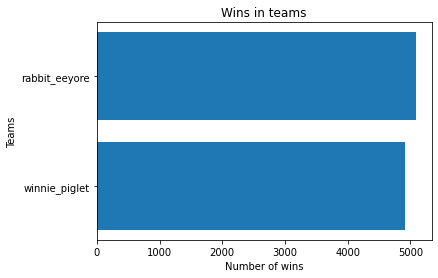

In [0]:
fig, ax = plt.subplots()

team_names = list(num_of_pair_wins.keys())
team_wins_number = list(num_of_pair_wins.values())

ax.barh(team_names, team_wins_number)

plt.xlabel('Number of wins')
plt.ylabel('Teams')
plt.title('Wins in teams')

plt.show()

Данные результаты логичны. Так же как и в индивидуальных соревнованиях, мы получаем практически одинаковое количество побед обеих команд.

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [0]:
def get_price(announ):
  try: 
    price = announ.find('span', {'class' : 'snippet-price snippet-price-vas' and 'snippet-price'}).text
    return price.replace('\n', '').replace(' ', '')[:-1]
  except:
    return None

In [0]:
def get_metro(announ):
  try:
    return announ.find('span', {'class' : 'item-address-georeferences-item'})
  except:
    return '';

In [0]:
def get_station(metro):
  try:
    return metro.find('span', {'class' : 'item-address-georeferences-item__content'}).text
  except:
    return '';

In [0]:
def get_distance(metro):
  try:
    return metro.find('span', {'class' : 'item-address-georeferences-item__after'}).text
  except:
    return None

In [0]:
def parse_page(search: str, page: int):
  page_link = 'https://www.avito.ru/moskva?q={}&p={}'.format(search, page)
  response = requests.get(page_link, headers={'User-Agent' : UserAgent().chrome})
  print(response)

  soup = BeautifulSoup(response.content, 'html.parser')
  try:
    announs = soup.find_all('div', {'class' : 'item__line'})
  except:
    return []
  links = []
  titles = []
  prices = []
  stations = []
  distances = []
  for announ in announs:
    links.append('https://www.avito.ru' + announ.find('a', {'class' : "snippet-link"}).attrs['href'])

    titles.append(announ.find('a', {'class' : 'snippet-link'}).text)

    prices.append(get_price(announ))

    metro = get_metro(announ)

    stations.append(get_station(metro))

    distances.append(get_distance(metro))

  return list(zip(titles, links, prices, stations, distances))

In [44]:
df = parse_page('гитара', 2)
df = pd.DataFrame(df, columns=['title', 'link', 'price', 'metro_station', 'distance_from_station'])
len(df)

<Response [200]>


51

In [45]:
df[:15]

,title,link,price,metro_station,distance_from_station
0,Гитара,https://www.avito.ru/moskva/muzykalnye_instrum...,1500,Семеновская,100 м
1,Гитара,https://www.avito.ru/moskva/muzykalnye_instrum...,1500,Семеновская,100 м
2,"Гитары Акустическая, Укулеле +Комплект Аксессу...",https://www.avito.ru/moskva/muzykalnye_instrum...,1550,Шоссе Энтузиастов,None
3,Занятия для детей по гитаре,https://www.avito.ru/moskva/predlozheniya_uslu...,100,Бабушкинская,"1,3 км"
4,Гитара Framus Ideal,https://www.avito.ru/moskva/muzykalnye_instrum...,4650,Кутузовская,None
5,Электро гитара в комплекте,https://www.avito.ru/moskva/muzykalnye_instrum...,17000,Щелковская,100 м
6,Гитара Legpap,https://www.avito.ru/moskva/muzykalnye_instrum...,8500,Новокосино,None
7,Гитара детская,https://www.avito.ru/moskva/tovary_dlya_detey_...,450,Калужская,800 м
8,"Классическая гитара 4/4,Cort AC 100 SG",https://www.avito.ru/moskva_zelenograd/muzykal...,7550,,None
9,Гитара Gibson Les Paul,https://www.avito.ru/moskva/muzykalnye_instrum...,150000,Новокосино,None


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [0]:
# ваше решение тут
walmart = pd.read_csv('walmart.csv')

In [0]:
print(walmart.shape)
walmart.columns

(418239, 16)


Index(['Store', 'Date', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [0]:
walmart.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [0]:
walmart.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [0]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         418239 non-null  int64  
 1   Date          418239 non-null  object 
 2   Dept          418239 non-null  int64  
 3   Weekly_Sales  418239 non-null  float64
 4   IsHoliday     418239 non-null  bool   
 5   Type          418239 non-null  object 
 6   Size          418239 non-null  int64  
 7   Temperature   418239 non-null  float64
 8   Fuel_Price    418239 non-null  float64
 9   MarkDown1     147484 non-null  float64
 10  MarkDown2     108144 non-null  float64
 11  MarkDown3     134568 non-null  float64
 12  MarkDown4     132315 non-null  float64
 13  MarkDown5     148182 non-null  float64
 14  CPI           418239 non-null  float64
 15  Unemployment  418239 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.3+ MB


В наборе имеется 418239 наблюдений, 16 переменных.

Типы переменных:

 №  Переменная       Тип

1.   **Store** - int64  
2.   **Date**            object 
3.   **Dept** - int64  
4.  **Weekly_Sales** -    float64
5.   **IsHoliday** -      bool   
6.   **Type**  -          object 
7.  **Size**          -  int64  
8.   **Temperature**   -  float64
9.  **Fuel_Price**     - float64
10.  **MarkDown1**    -   float64
11.  **MarkDown2**    -   float64
12.  **MarkDown3**    -   float64
13.  **MarkDown4**   -  float64
14.  **MarkDown5**     -  float64
15.  **CPI**            - float64
16.  **Unemployment**   - float64

In [0]:
walmart['Date'] = pd.to_datetime(walmart['Date'], format = '%Y-%m-%d')
walmart.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [0]:
wal = walmart
for column in walmart.columns:
  nan_percentage = walmart[column].isnull().sum()/ len(walmart[column]) * 100
  print(column + " : ", nan_percentage, "% of NaN")
  if(nan_percentage > 60):
    wal = wal.drop([column], axis=1)

Store :  0.0 % of NaN
Date :  0.0 % of NaN
Dept :  0.0 % of NaN
Weekly_Sales :  0.0 % of NaN
IsHoliday :  0.0 % of NaN
Type :  0.0 % of NaN
Size :  0.0 % of NaN
Temperature :  0.0 % of NaN
Fuel_Price :  0.0 % of NaN
MarkDown1 :  64.73690880094874 % of NaN
MarkDown2 :  74.14301392266145 % of NaN
MarkDown3 :  67.82509522067525 % of NaN
MarkDown4 :  68.3637824306198 % of NaN
MarkDown5 :  64.57001857789446 % of NaN
CPI :  0.0 % of NaN
Unemployment :  0.0 % of NaN


In [0]:
wal.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [0]:
print("Num of stores:", wal['Store'].nunique()) # Количество магазинов
print("Num of depts:", wal["Dept"].nunique()) # Количество департаментов
print("From", wal['Date'].min(), "to", wal["Date"].max()) # период

Num of stores: 45
Num of depts: 81
From 2010-02-05 00:00:00 to 2012-10-19 00:00:00


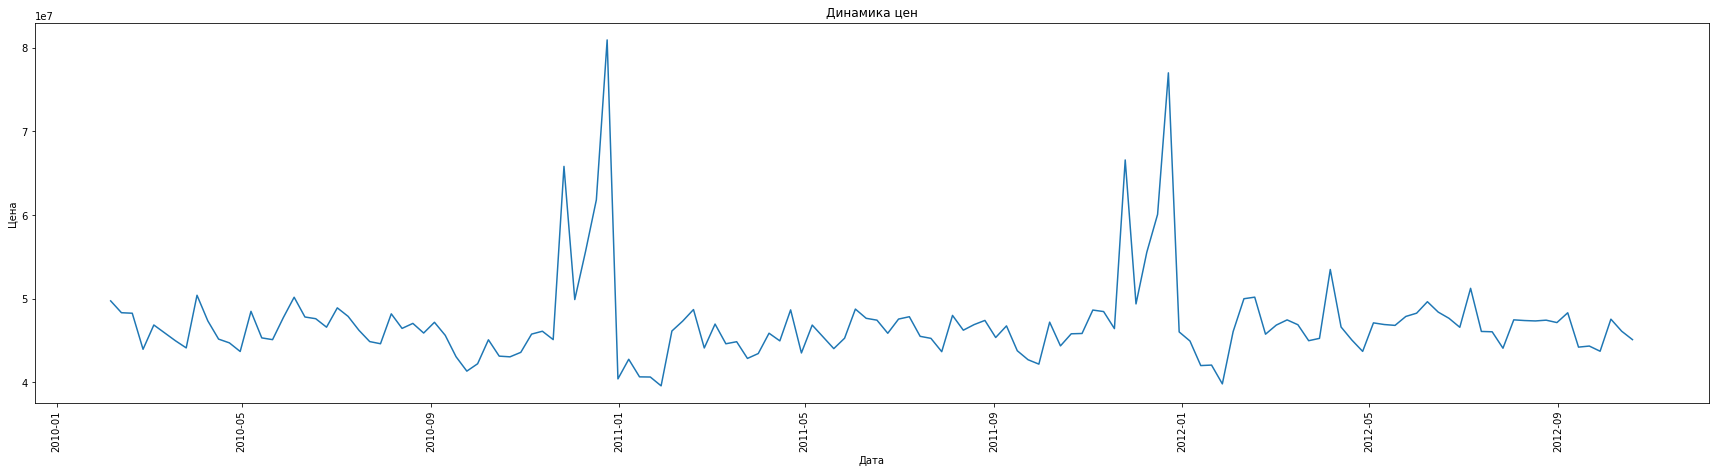

In [0]:
plt.figure(figsize=(30, 7))
plt.plot(wal[['Weekly_Sales', 'Date']].groupby('Date').sum())
plt.title('Динамика цен')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.show()

In [0]:
wal.drop(['IsHoliday', 'Type'], axis=1).corr()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.024170,-0.085175,-0.182654,-0.049933,0.064666,-0.211129,0.208524
Dept,0.024170,1.000000,0.148345,-0.003026,0.004509,0.003417,-0.007544,0.007992
Weekly_Sales,-0.085175,0.148345,1.000000,0.243733,-0.002197,0.000385,-0.020791,-0.026114
Size,-0.182654,-0.003026,0.243733,1.000000,-0.057979,0.003803,-0.003249,-0.068803
Temperature,-0.049933,0.004509,-0.002197,-0.057979,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.064666,0.003417,0.000385,0.003803,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.211129,-0.007544,-0.020791,-0.003249,0.181292,-0.163226,1.000000,-0.299723
Unemployment,0.208524,0.007992,-0.026114,-0.068803,0.097301,-0.032461,-0.299723,1.000000


In [0]:

wal_top = wal.groupby(['Store'], as_index=False)['Weekly_Sales'].sum()
wal_top = wal_top.nlargest(5, 'Weekly_Sales')

wal_trend = wal.groupby(['Date','Store'], as_index=False)['Weekly_Sales'].sum()
wal_trend = wal_trend.merge(wal_top, on='Store')
print(wal_trend.columns)

wal_trend.rename(columns={'Store' : 'Stores', 
                         'Weekly_Sales_x':'Sales',
                         }, 
                inplace=True)
px.line(wal_trend, 
        title='Динамика цен в топ-5 магазинов',
        x='Date', 
        y='Sales',
        color='Stores')

Index(['Date', 'Store', 'Weekly_Sales_x', 'Weekly_Sales_y'], dtype='object')


In [0]:
wal_2011 = wal[(wal['Date'] > '2010-12-31') & (wal['Date'] < '2012-01-01') & (wal["Type"]=='A')]
wal_2011_top10 = wal_2011.groupby('Dept', as_index=False)['Weekly_Sales'].sum()
wal_2011_top10 = wal_2011_top10.nlargest(10, 'Weekly_Sales')
depts = wal_2011_top10['Dept'].astype('str')
sales = wal_2011_top10['Weekly_Sales']

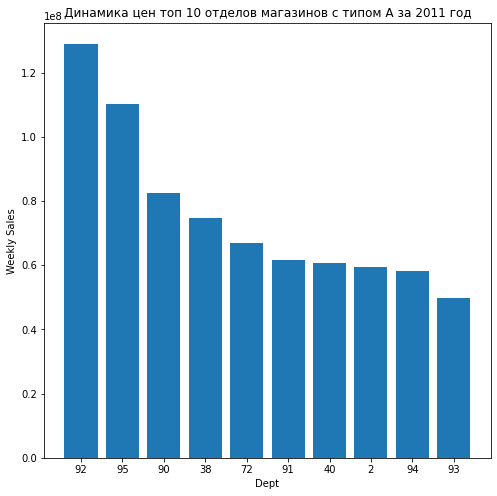

In [0]:
fig, ax = plt.subplots()

ax.bar(depts, sales)

fig.set_size_inches(8, 8)
plt.xlabel('Dept')
plt.ylabel('Weekly Sales')
plt.title('Динамика цен топ 10 отделов магазинов с типом А за 2011 год')

plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [0]:
# ваше решение тут
version = '5.103'
token = ''# сюда свой токен)

In [0]:
def vk_download(method, parameters):
  version = '5.103'
  token = ''# сюда свой токен)
  url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token
  response = requests.get(url)
  if not response.ok:
    print('Ошибка при отправке запроса на сайт')
    return []
  return response.json()

In [0]:
def get_followers(group_id):
  followers = []
  for offset in range(0, 5000, 100):
    time.sleep(0.4)
    cur_followers = vk_download('groups.getMembers', 'group_id={}&count=100&fields=bdate&offset={}'.format(group_id, offset))
    if 'error' in cur_followers:
      print('Ошибка')
      print(cur_followers['error']['error_msg'])
      break;
    followers.extend(cur_followers['response']['items'])
  return followers

In [0]:
group_id = '101965347'
followers = get_followers(group_id)

In [0]:
followers_with_bdate = [item for item in followers if 'bdate' in item]
for follower in followers_with_bdate:
  follower['bdate'] = follower['bdate'].split('.')
  follower['bdate'] = follower['bdate'][0] + '.' + follower['bdate'][1]
followers_with_bdate[4]['bdate'].split('.')[1]
months = [int(item['bdate'].split('.')[1]) for item in followers_with_bdate]

In [0]:
months.count(1)
bdate_count = [months.count(i) for i in range(1, 13)]
bdate_count

[276, 262, 321, 285, 292, 308, 293, 276, 260, 255, 222, 302]

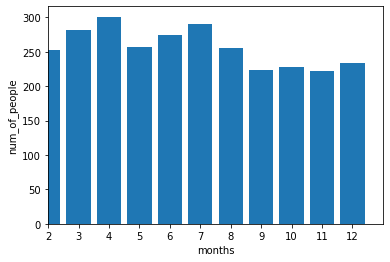

In [0]:

fig, ax = plt.subplots()

ax.bar(list(map(str, np.arange(1, 13))), m)

plt.xlim(1, 12)
plt.xlabel('months')
plt.ylabel('num_of_people')
plt.show()

да, рождаемость распределена равномерно.

In [0]:
def birth_probability(times, bdates)-> float:
  equal = 0
  count = 0
  for i in range(times):
    sample = np.random.choice(bdates, size=50)
    sample_unique = np.unique(sample)
    for date in sample_unique:
      count += 1
      num = (sample == date).sum()
      equal += num if num > 1 else 0
  return float(equal)/(count)

In [0]:
bdates = [follower['bdate'] for follower in followers_with_bdate]
print('вероятность, что хотя бы у двоих день рождения в один день:', birth_probability(20, bdates))

вероятность, что хотя бы у двоих день рождения в один день: 0.1635969664138678
